# Benchmarking of integration methods - Harmony
In this notebook Harmony will be used to integrate the 6 atlases for future evaluation

In [1]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/bin/python
3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) 
[GCC 9.4.0]
sys.version_info(major=3, minor=9, micro=9, releaselevel='final', serial=0)


In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))#embed HTML within IPython notebook and make containers 90% of screen
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
import seaborn as sns
import os
import matplotlib.pyplot as plt
import torch

%matplotlib inline
sc.settings.verbosity = 0             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white') #figure resolution and background color

# This is used
# os.path.join('data/'+object_names[i][6:10]+'_preprocessed.h5ad')
#sc.logging.print_versions()

In [3]:
#set data path
os.chdir('/home/hers_basak/jjiang/jack/outputs/deliverables/5_integration/data/scvi/')
sc.settings.figdir = '/home/hers_basak/jjiang/jack/outputs/deliverables/5_integration/figures/'
#To make reproducible plots
np.random.seed(41)

In [7]:
files=['/home/hers_basak/jjiang/jack/outputs/deliverables/5_integration/data/complete_base_hvg_labelled.h5ad']
names=['complete']
object_names_merged=list()
numberobj = len(files)

for i in range(numberobj):
    object_names_merged.append("adata"+"_"+names[i])
    locals()[object_names_merged[i]] = sc.read(files[i]) 
    print(object_names_merged[i],' is loaded')

adata_complete  is loaded


In [8]:
adata_complete

AnnData object with n_obs × n_vars = 507798 × 4000
    obs: 'species', 'gender', 'age', 'instrument', 'technology', 'atlas', 'sample', 'batch_1', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'total_counts_mito', 'total_counts_norm', 'original_Library', 'original_Brain_Region', 'original_Level_1_cell_type', 'original_Level_2_cell_type', 'original_cellclass_lvl1', 'original_subclass_lvl3_1', 'original_cellclass_lvl1_n', 'original_lineage', 'original_subclass_lvl2', 'original_celltype_lvl3', 'donor', 'original_supercluster_term', 'original_cluster_id', 'original_subcluster_id', 'original_celltype', 'cell_type_lvl1', 'cell_type_lvl2', 'cell_type_lvl3', 'harmonized_cell_type_filtered_02_scvi'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_varia

In [9]:
atlases=['altena','agarwal','siletti','smajic','wang','welch']
for i in atlases:
    print(len(adata_complete.obs_names[adata_complete.obs['atlas']==i]))

84809
9027
282378
28812
38294
64478


In [8]:
sc.pp.highly_variable_genes(
    adata_complete,
    n_top_genes=4000,
    batch_key="atlas",
    subset=True)

In [8]:
"""adata_complete.X = adata_complete.raw[:, adata_complete.var_names].X"""

'adata_complete.X = adata_complete.raw[:, adata_complete.var_names].X'

Harmony works with normalized data

In [10]:
print(adata_complete.X)

  (0, 2085)	0.63496566
  (0, 1195)	1.1685715
  (0, 474)	1.51465
  (0, 1603)	1.1685715
  (0, 2127)	3.0210617
  (0, 853)	0.36705592
  (0, 2580)	0.36705592
  (0, 2692)	0.63496566
  (0, 3736)	0.36705592
  (0, 2520)	0.63496566
  (0, 2001)	1.4120475
  (0, 1534)	0.63496566
  (0, 1339)	1.8439951
  (0, 1828)	1.4120475
  (0, 865)	0.36705592
  (0, 2600)	0.63496566
  (0, 543)	0.8460554
  (0, 1511)	1.2977014
  (0, 1394)	2.5281613
  (0, 2473)	2.195291
  (0, 2795)	0.36705592
  (0, 524)	0.8460554
  (0, 1409)	0.8460554
  (0, 2965)	0.36705592
  (0, 1660)	0.63496566
  :	:
  (507797, 3426)	2.8560932
  (507797, 1514)	2.8560932
  (507797, 2523)	2.8560932
  (507797, 1971)	2.8560932
  (507797, 3197)	2.8560932
  (507797, 1457)	2.8560932
  (507797, 3576)	2.8560932
  (507797, 760)	2.8560932
  (507797, 2331)	2.8560932
  (507797, 3080)	2.8560932
  (507797, 3352)	2.8560932
  (507797, 2874)	2.8560932
  (507797, 2515)	5.0008607
  (507797, 1327)	2.8560932
  (507797, 3536)	2.8560932
  (507797, 3862)	2.8560932
  (507797

Perform harmony integration using the atlas specific harmony PCs (does not work)

In [11]:
sc.tl.pca(adata_complete, svd_solver='arpack')

In [12]:
sc.external.pp.harmony_integrate(adata_complete, key =['atlas'],basis='X_pca',adjusted_basis='X_pca_harmony')

2023-10-29 20:49:36,010 - harmonypy - INFO - Iteration 1 of 10
2023-10-29 20:55:14,456 - harmonypy - INFO - Iteration 2 of 10
2023-10-29 21:00:48,319 - harmonypy - INFO - Iteration 3 of 10
2023-10-29 21:06:10,438 - harmonypy - INFO - Converged after 3 iterations


In [13]:
adata_complete.write('/home/hers_basak/jjiang/jack/outputs/deliverables/5_integration/data/complete_base_hvg_labelled.h5ad')

In [13]:
sc.pp.neighbors(adata_complete, n_pcs=50,n_neighbors=30,use_rep='X_pca_harmony2')

sc.tl.umap(adata_complete)
sc.tl.leiden(adata_complete)

In [14]:
adata_complete

AnnData object with n_obs × n_vars = 522220 × 4000
    obs: 'species', 'gender', 'age', 'instrument', 'technology', 'atlas', 'sample', 'batch_1', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'total_counts_mito', 'total_counts_norm', 'original_Library', 'original_Brain_Region', 'original_Level_1_cell_type', 'original_Level_2_cell_type', 'original_cellclass_lvl1', 'original_subclass_lvl3_1', 'original_cellclass_lvl1_n', 'original_lineage', 'original_subclass_lvl2', 'original_celltype_lvl3', 'donor', 'original_supercluster_term', 'original_cluster_id', 'original_subcluster_id', 'original_celltype', 'cell_type_lvl1', 'cell_type_lvl2', 'cell_type_lvl3', 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable

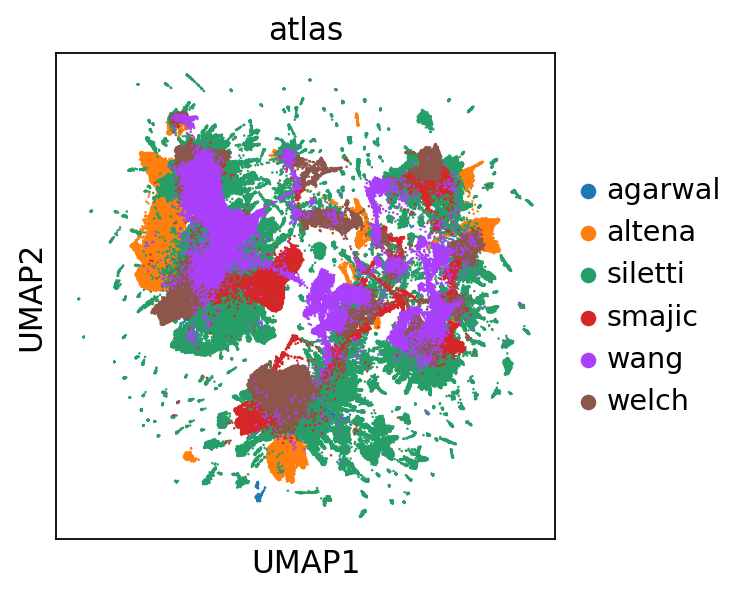

In [15]:
sc.pl.umap(adata_complete, color=['atlas'], 
               use_raw=False, s=5, wspace=0.5,save='adata_complete_harmony2_all.png')

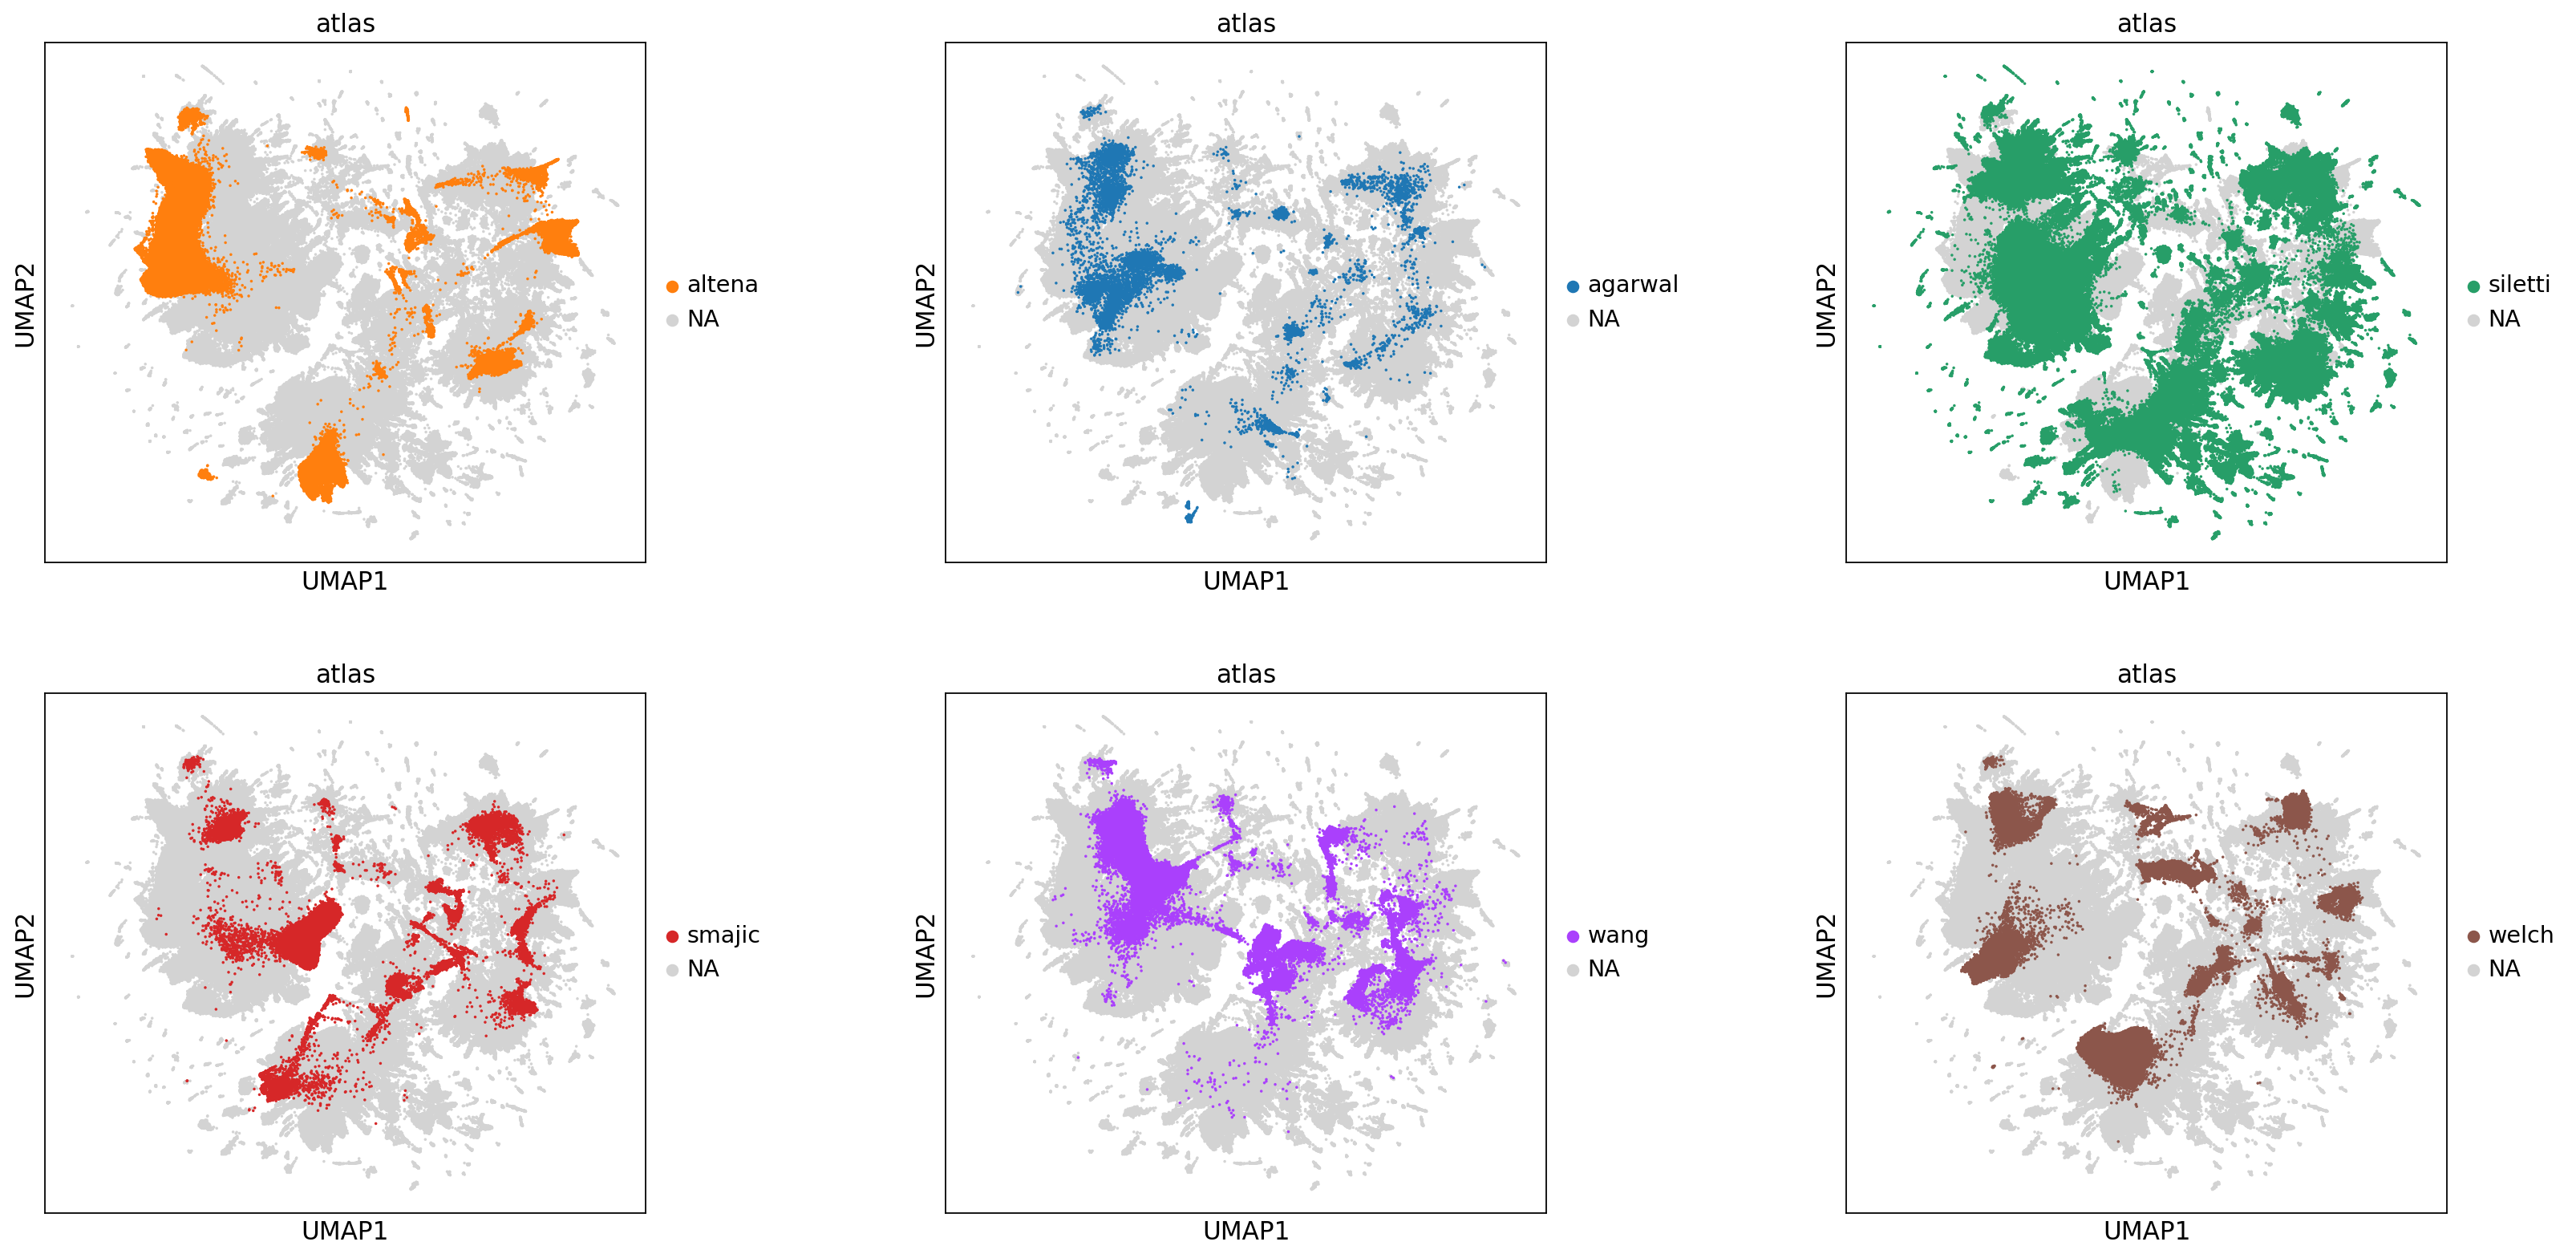

In [16]:
feature1='atlas'
title1='atlas'
fig, axs = plt.subplots(2, 3, figsize = [24,12])
#axs[-1, -1].axis('off')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.25)
sc.pl.umap(adata_complete, color=feature1, groups= 'altena', use_raw=False, s=10, ax= axs[0,0],show=False, title=title1)
sc.pl.umap(adata_complete, color=feature1, groups= 'agarwal', use_raw=False, s=10, ax= axs[0,1],show=False, title=title1)
sc.pl.umap(adata_complete, color=feature1, groups= 'siletti', use_raw=False, s=10, ax= axs[0,2],show=False, title=title1)
sc.pl.umap(adata_complete, color=feature1, groups= 'smajic', use_raw=False, s=10, ax= axs[1,0],show=False, title=title1)
sc.pl.umap(adata_complete, color=feature1, groups= 'wang', use_raw=False, s=10, ax= axs[1,1],show=False, title=title1)
sc.pl.umap(adata_complete, color=feature1, groups= 'welch', use_raw=False, s=10, ax= axs[1,2],show=False, title=title1)
fig.savefig(f'/home/hers_basak/jjiang/jack/outputs/deliverables/5_integration/figures/adata_complete_harmony2_subplots.png',bbox_inches='tight')

## New Harmony 

In [9]:
sc.tl.pca(adata_complete, svd_solver='arpack')
sc.external.pp.harmony_integrate(adata_complete, key =['atlas'])


2023-09-29 10:19:33,812 - harmonypy - INFO - Iteration 1 of 10
2023-09-29 10:26:41,083 - harmonypy - INFO - Iteration 2 of 10
2023-09-29 10:33:44,123 - harmonypy - INFO - Iteration 3 of 10
2023-09-29 10:40:38,371 - harmonypy - INFO - Converged after 3 iterations


In [11]:
sc.pp.neighbors(adata_complete, n_pcs=50,n_neighbors=30,use_rep='X_pca_harmony')

sc.tl.umap(adata_complete)

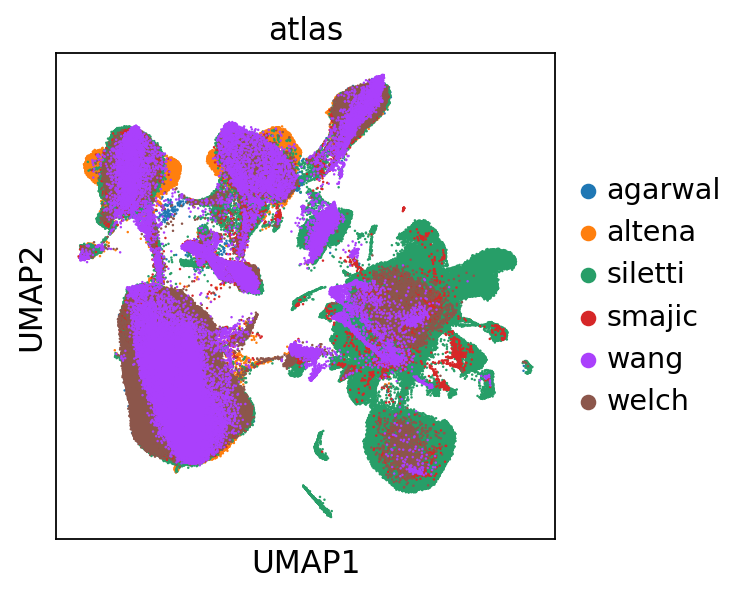

In [15]:
sc.pl.umap(adata_complete, color=['atlas'], 
               use_raw=False, s=5, wspace=0.5,save='adata_complete_harmony_all.png')

In [ ]:
sc.pl.umap(adata_complete, color=['total_counts'], 
               use_raw=False, s=5, wspace=0.5,save='adata_complete_harmony_all.png')

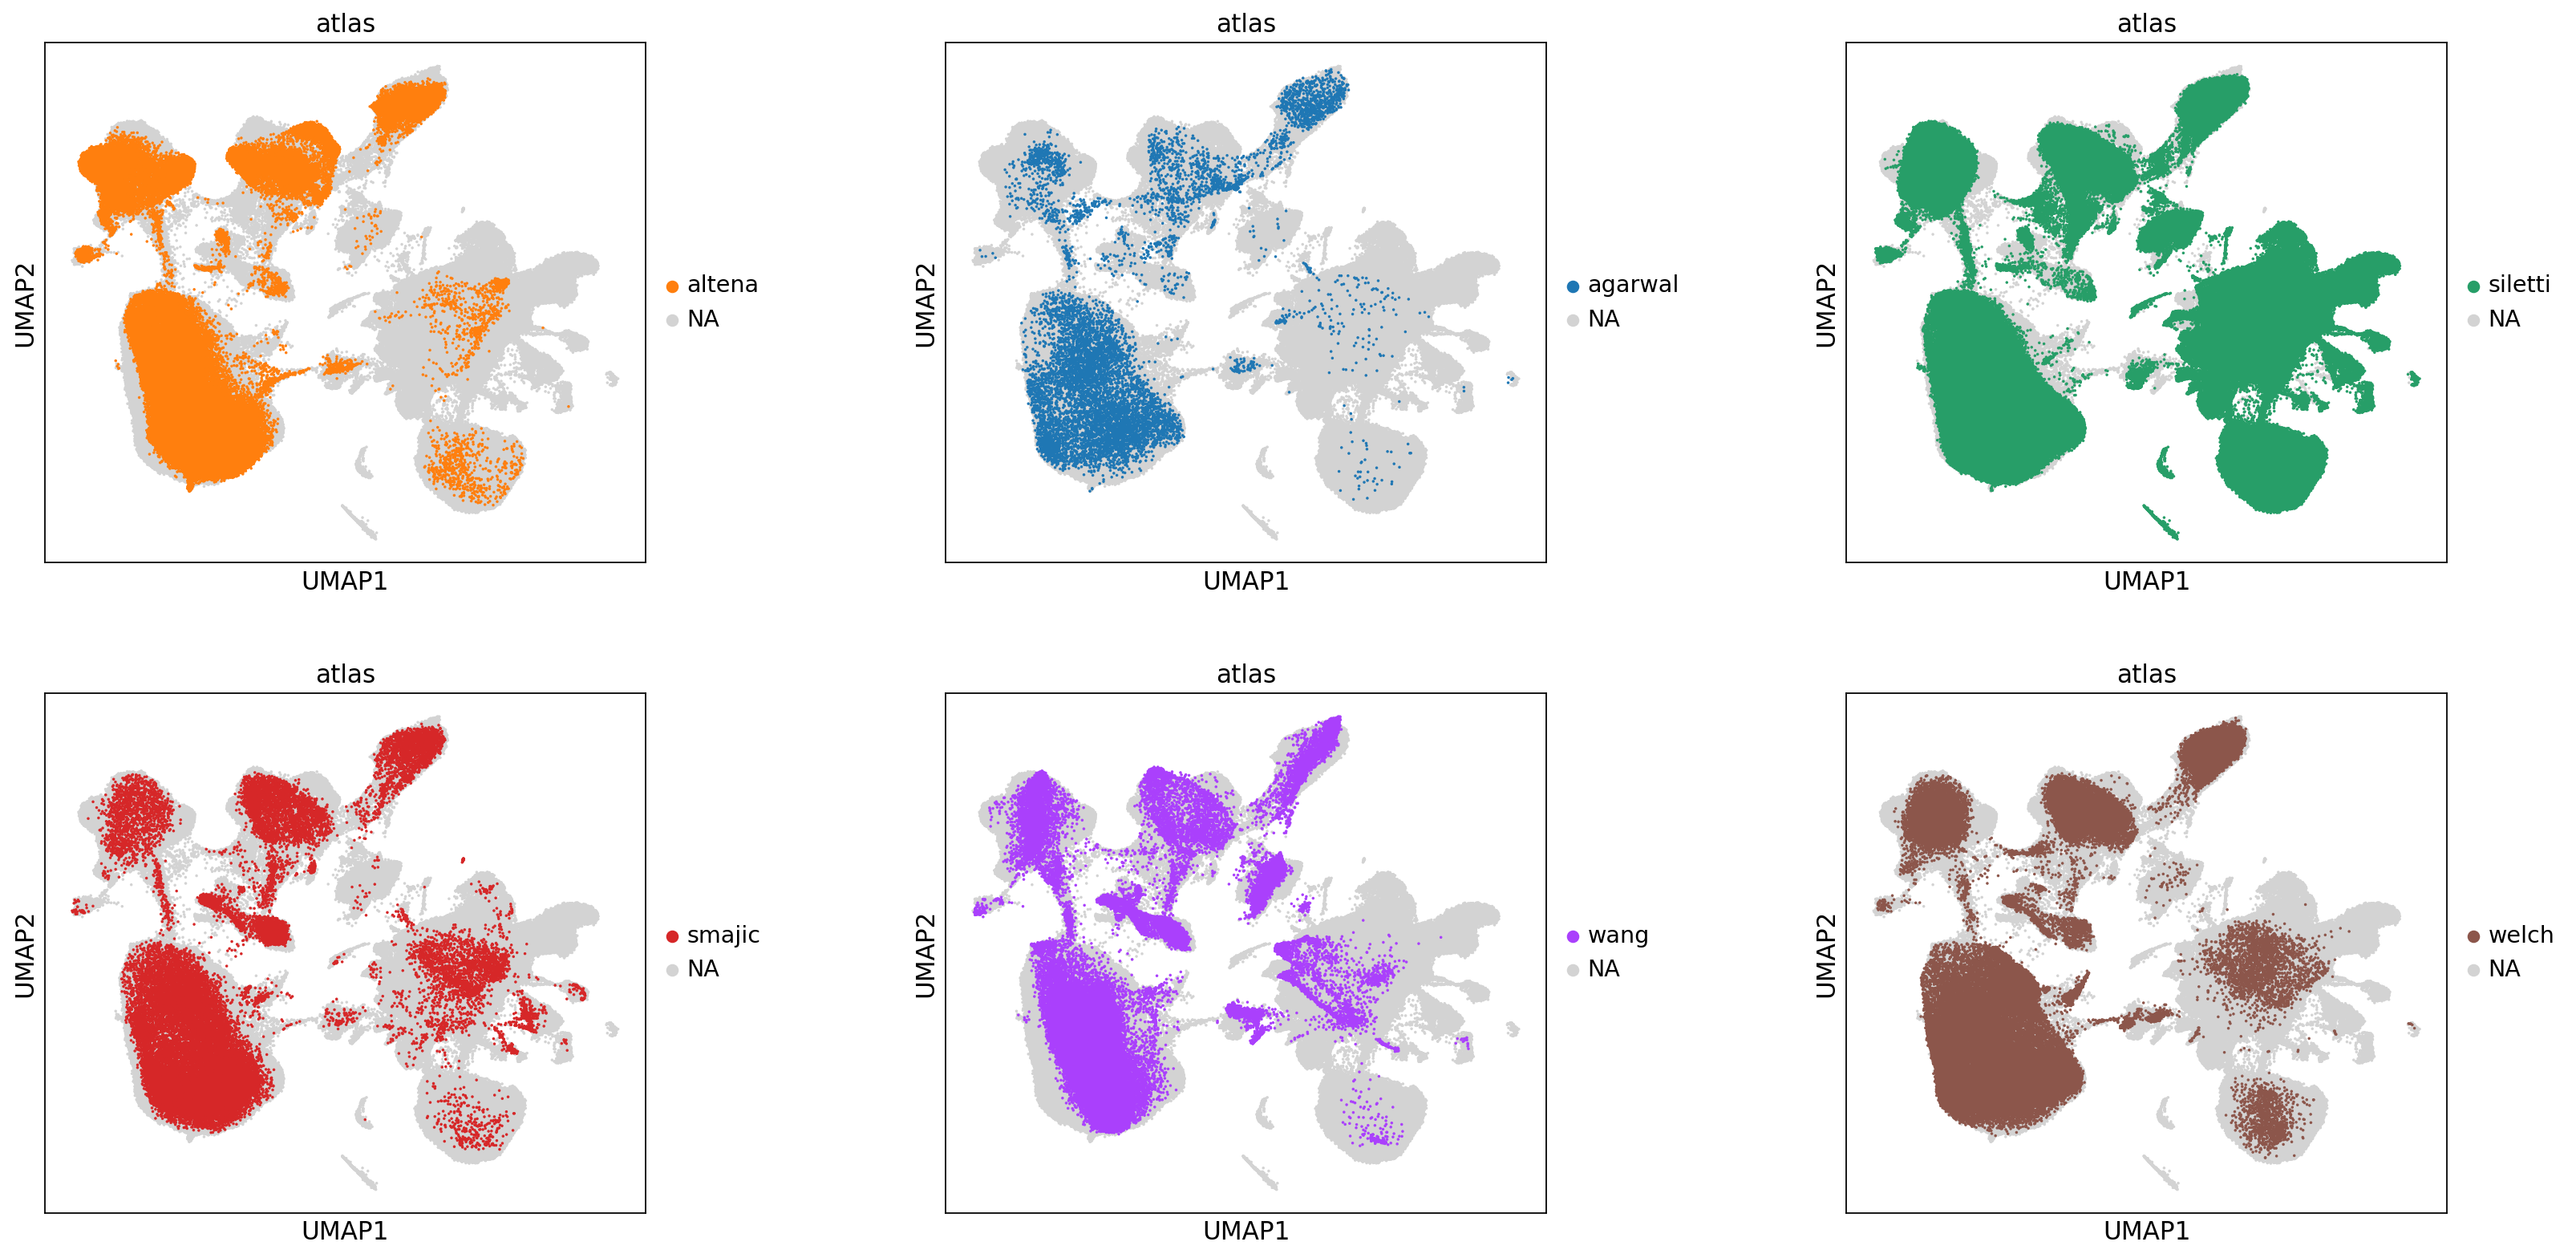

In [14]:
feature1='atlas'
title1='atlas'
fig, axs = plt.subplots(2, 3, figsize = [24,12])
#axs[-1, -1].axis('off')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.25)
sc.pl.umap(adata_complete, color=feature1, groups= 'altena', use_raw=False, s=10, ax= axs[0,0],show=False, title=title1)
sc.pl.umap(adata_complete, color=feature1, groups= 'agarwal', use_raw=False, s=10, ax= axs[0,1],show=False, title=title1)
sc.pl.umap(adata_complete, color=feature1, groups= 'siletti', use_raw=False, s=10, ax= axs[0,2],show=False, title=title1)
sc.pl.umap(adata_complete, color=feature1, groups= 'smajic', use_raw=False, s=10, ax= axs[1,0],show=False, title=title1)
sc.pl.umap(adata_complete, color=feature1, groups= 'wang', use_raw=False, s=10, ax= axs[1,1],show=False, title=title1)
sc.pl.umap(adata_complete, color=feature1, groups= 'welch', use_raw=False, s=10, ax= axs[1,2],show=False, title=title1)
fig.savefig(f'/home/hers_basak/jjiang/jack/outputs/deliverables/5_integration/figures/adata_complete_harmony_subplots.png',bbox_inches='tight')

In [ ]:
sc.pl.umap(adata_complete, color=['atlas'], 
               use_raw=False, s=5, wspace=0.5,save='adata_complete_harmony_all_leiden.png')

In [ ]:
feature1='atlas'
title1='atlas'
fig, axs = plt.subplots(2, 3, figsize = [24,12])
#axs[-1, -1].axis('off')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.25)
sc.pl.umap(adata_complete, color=feature1, groups= 'altena', use_raw=False, s=10, ax= axs[0,0],show=False, title=title1)
sc.pl.umap(adata_complete, color=feature1, groups= 'agarwal', use_raw=False, s=10, ax= axs[0,1],show=False, title=title1)
sc.pl.umap(adata_complete, color=feature1, groups= 'siletti', use_raw=False, s=10, ax= axs[0,2],show=False, title=title1)
sc.pl.umap(adata_complete, color=feature1, groups= 'smajic', use_raw=False, s=10, ax= axs[1,0],show=False, title=title1)
sc.pl.umap(adata_complete, color=feature1, groups= 'wang', use_raw=False, s=10, ax= axs[1,1],show=False, title=title1)
sc.pl.umap(adata_complete, color=feature1, groups= 'welch', use_raw=False, s=10, ax= axs[1,2],show=False, title=title1)
fig.savefig(f'/home/hers_basak/jjiang/jack/outputs/deliverables/5_integration/figures/adata_complete_harmony_subplots_leiden.png',bbox_inches='tight')